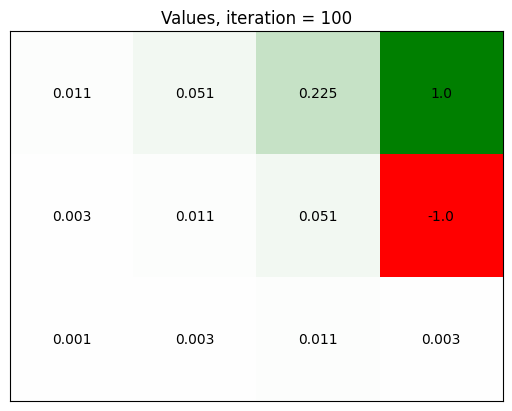

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.animation import FuncAnimation, PillowWriter
import io

class value_iteration:
    def __init__(self, ROWS=3, COLS=4, 
                 rewards={(4, 3): 1, (4, 2): -1},
                 actions=[(0, 1), (0, -1), (1, 0), (-1, 0)], 
                 gamma=0.9, H=100,
                 exceptions=[(2, 2)]):
        self.ROWS = ROWS
        self.COLS = COLS
        self.rewards = rewards
        self.actions = actions
        self.transition_prob = 1/len(actions)
        self.gamma = gamma
        self.H = H
        self.exceptions = [(ex[0]-1, ex[1]-1) for ex in exceptions]
        self.values = []

    def iterate(self):
        # initialize the value function
        v = np.zeros((self.COLS,self.ROWS))
        self.values.append(v)

        # iteratate k = 1, ..., H
        for iter in range(1, self.H+1):
            # print('H =', iter)
            _v = np.zeros((self.COLS,self.ROWS))
            for i in range(self.COLS):
                for j in range(self.ROWS):
                    # print('i, j:', i, j)
                    value = 0
                    if (i+1,j+1) not in self.rewards.keys():
                        max_value = -10000
                        for action in self.actions:
                            next_state = (i + action[0], j + action[1])
                            if next_state[0] < 0 or next_state[0] >= self.COLS or next_state[1] < 0 or next_state[1] >= self.ROWS or next_state in self.exceptions:
                                next_state = (i, j)
                            value = self.transition_prob * self.gamma * v[next_state[0], next_state[1]]
                            # print('next_state:', next_state, 'value:', value)
                            max_value = max(value, max_value)
                        _v[i,j] = max_value
                    else: _v[i,j] = self.rewards[(i+1,j+1)]
            v = _v
            # print(v)
            self.values.append(v)

    # def plot_matrix(self, iter=-1, show=True):
    #     matrix_rotated = np.rot90(self.values[iter], 1)
    #     for i in range(self.ROWS):
    #         for j in range(self.COLS):
    #             plt.text(j, i, round(matrix_rotated[i, j], 3), ha='center', va='center')
    #     cmap=LinearSegmentedColormap.from_list('rg',["r", 'w', "g"], N=256) 
    #     plt.imshow(matrix_rotated, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1)
    #     if iter < 0: plt.title('Values, iteration = '+ str(self.H))
    #     else: plt.title('Values, iteration = '+ str(iter))
    #     plt.xticks([])
    #     plt.yticks([])
    #     if show: plt.show()

    def plot_matrix(self, iter=-1, return_img=False):
        fig, ax = plt.subplots()
        matrix_rotated = np.rot90(self.values[iter], 1)
        for i in range(self.ROWS):
            for j in range(self.COLS):
                ax.text(j, i, round(matrix_rotated[i, j], 3), ha='center', va='center')
        cmap = LinearSegmentedColormap.from_list('rg', ["r", 'w', "g"], N=256)
        ax.imshow(matrix_rotated, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1)
        if iter < 0: ax.set_title('Values, iteration = '+ str(self.H))
        else: ax.set_title('Values, iteration = '+ str(iter))
        ax.set_xticks([])
        ax.set_yticks([])
        
        if return_img:
            canvas = FigureCanvas(fig)
            canvas.draw()       # draw the canvas, cache the renderer
            img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
            img = img.reshape(canvas.get_width_height()[::-1] + (3,))
            plt.close(fig)      # close the figure to prevent display
            return img
        else:
            plt.show()

vi = value_iteration()
vi.iterate()
vi.plot_matrix()


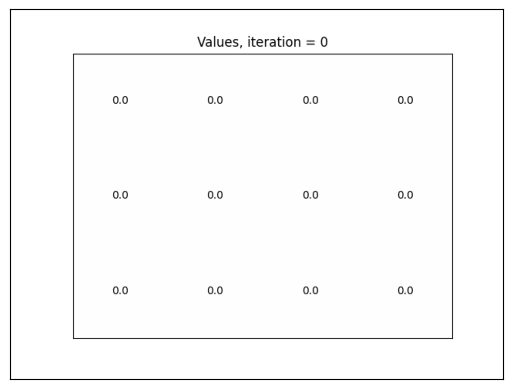

In [6]:
images = []
for i in range(vi.H):
    img = vi.plot_matrix(iter=i, return_img=True)
    images.append(img)
fig, ax = plt.subplots()
def update(frame):
    ax.clear()
    ax.imshow(images[frame])
    ax.set_xticks([])
    ax.set_yticks([])
ani = FuncAnimation(fig, update, frames=range(len(images)), blit=False)
ani.save('animation.gif', writer=PillowWriter(fps=30))
